In [27]:
import os
import glob
import math
import re
import matplotlib.pyplot as plt

In [30]:
files = glob.glob(os.curdir+'/lab3/*.txt',recursive = True)
files.sort()
def read_files(files):
    sample=[]
    for file in files:
        data = []
        with open(file,"r+") as f:
             for letter in f:
                data +=letter
                
        data = ''.join([i for i in data if not i.isdigit()])
        data = re.sub(' +',' ',data)
        sample.append(data)
        
    return sample
en,eo,et,ht,la,nv,so,sample0,sample1,sample2,sample3,sample4,sample5 = read_files(files)   

In [32]:
def get_probabilites_for_chars(sample,jump,letters_occurances,probabilites):
    for pointer in range(0,len(sample)):
        char = sample[pointer:pointer+jump+1] 
        if len(char) == jump+1:
            if char in letters_occurances:
                letters_occurances[char]+=1
            else:
                letters_occurances[char] =1
    for x in letters_occurances:
        probabilites[x] = letters_occurances[x]/(len(sample))
    return probabilites

In [33]:
def get_probabilites_for_words(sample,jump,words_occurances,probabilites):
    words = []
    for pointer in range(len(sample)):
        word = sample[pointer:pointer+jump+1]
        if len(word) == jump+1:
            word = ' '.join(word) 
            if word in words_occurances:
                words_occurances[word]+=1
            else:
                words_occurances[word] = 1
    for x in words_occurances:
        probabilites[x] = words_occurances[x]/(len(sample))
    return probabilites

In [34]:
def generate_probabilites(sample):
    words_sample = sample.split(" ")
    char_probabilities = []
    word_probabilities = []
    for i in range(6):
        char_probabilities.append(get_probabilites_for_chars(sample,i,{},{}))
        word_probabilities.append(get_probabilites_for_words(words_sample,i,{},{}))
    return char_probabilities,word_probabilities

In [35]:
def conditional_entropy_char(prob2,prob1):
    ce = 0
    for i in prob2:
        k = i[:-1]
        ce+=(prob2[i] * math.log(prob2[i]/prob1[k]))
    return -ce

In [36]:
def conditional_entropy_word(prob2,prob1):
    ce = 0
    for i in prob2:
        k = ' '.join(i.split(" ")[:-1])
        ce+=(prob2[i] * math.log(prob2[i]/prob1[k]))
    return -ce

In [37]:
def get_conditional_entropy(sample):
    char_probabilities,word_probabilities = generate_probabilites(sample)
    char_ce = []
    word_ce = []
    char0 = 0
    for i in char_probabilities[0]:
        char0+=(char_probabilities[0][i] * math.log(char_probabilities[0][i]))
    char_ce.append(-char0)
    for i in range(1,6):
        char_ce.append(conditional_entropy_char(char_probabilities[i],char_probabilities[i-1]))
  
    words0=0
    for i in word_probabilities[0]:
        words0+=(word_probabilities[0][i] * math.log(word_probabilities[0][i]))
    word_ce.append(-words0)
    for i in range(1,6):
        word_ce.append(conditional_entropy_word(word_probabilities[i],word_probabilities[i-1]))
    return char_ce,word_ce

In [39]:
char_ce,word_ce =[],[]
for sample in [en,eo,et,ht,la,nv,sample0,sample1,sample2,sample3,sample4,sample5]:
    x = get_conditional_entropy(sample)
    char_ce.append(x[0])
    word_ce.append(x[1])

Conditial entropy for en:  [7.844710835622655, 4.428291440212161, 1.5664599924865785, 0.3611221836129606, 0.08327924779168717, 0.02314536131820092]
0
Conditial entropy for eo:  [7.88847369803415, 4.52139690448321, 1.7489154135555658, 0.46154587971600314, 0.12390338769133877, 0.038143116686190026]
1
Conditial entropy for et:  [9.467318991163722, 3.74959532515406, 0.6222104222405075, 0.08264918986574389, 0.01767837699440477, 0.00638849792729991]
2
Conditial entropy for ht:  [5.4195079658450185, 2.1358950537124612, 0.8497377423059134, 0.5114738930225873, 0.3932850199764764, 0.34133586045559616]
3
Conditial entropy for la:  [8.212642316375558, 3.018242206331773, 0.7210571330356256, 0.2288647840117122, 0.12712637126876813, 0.09683404713795965]
4
Conditial entropy for nv:  [6.1099068702246715, 2.5799518816282325, 1.1388089308352822, 0.5997677562714613, 0.3522824209756084, 0.2228061762411367]
5


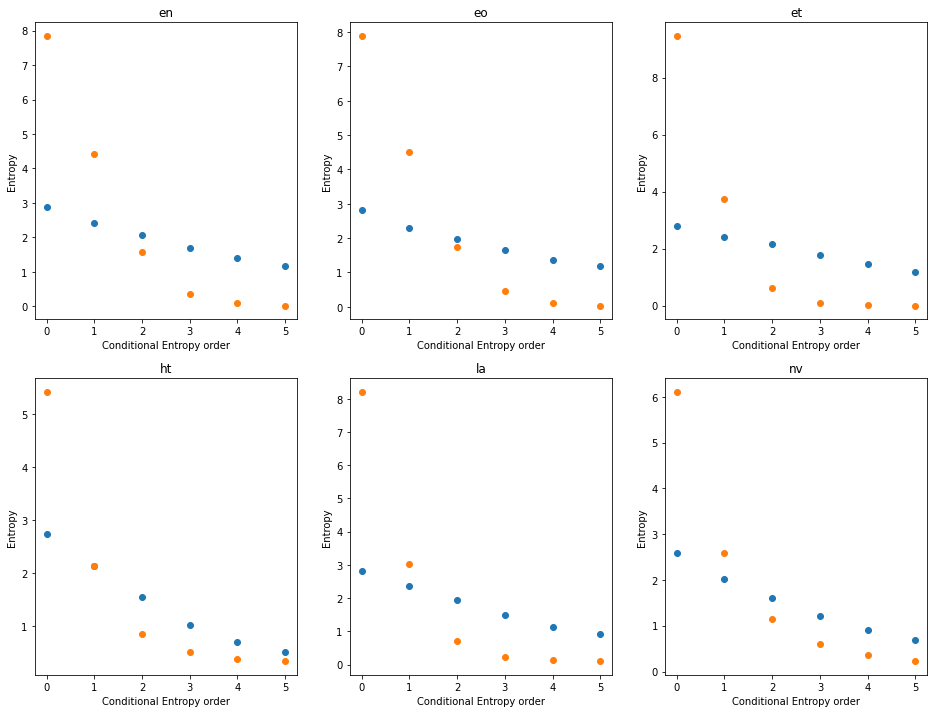

In [47]:
fig, axs = plt.subplots(2,3)
fig.set_size_inches(16,12)
for i,language in zip(range(0,6),['en','eo','et','ht','la','nv','so']):
    print(f"Conditial entropy for {language}: ",word_ce[i])
    k=i
    print(k)
    axs[k//3][k%3].scatter([0,1,2,3,4,5],char_ce[i],label="characters")
    axs[k//3][k%3].scatter([0,1,2,3,4,5],word_ce[i],label="words")
    axs[k//3][k%3].set_title(f"{language}")
    axs[k//3][k%3].set(xlabel='Conditional Entropy order', ylabel='Entropy')
plt.show()

Conditial entropy for sample0:  [4.6763761711995055, 4.640941024968727, 3.650686597248613, 0.8054507818693644, 0.02765929003537309, 0.00039943763969300315]
Conditial entropy for sample1:  [7.872682165358151, 3.7177104027507486, 1.1046465497555453, 0.35882386035554753, 0.20668770091989822, 0.10716537010179703]
Conditial entropy for sample2:  [5.505623797409903, 5.064378801127007, 2.662798634171465, 0.6229310553370004, 0.06117653804292287, 0.0022968666593737325]
Conditial entropy for sample3:  [6.145597729131957, 4.09250445200191, 1.8429161647660097, 0.8857189148487338, 0.28923460916663746, 0.13287644286511194]
Conditial entropy for sample4:  [11.654330498155515, 2.564952098269831, 0.1968341723431435, 0.0032952423800456875, 8.336255982488502e-06, -0.0]
Conditial entropy for sample5:  [11.320353425455487, 0.013042137923341619, 7.240363103918276e-07, 7.240363103918276e-07, 7.240363103918276e-07, 7.240363103918276e-07]


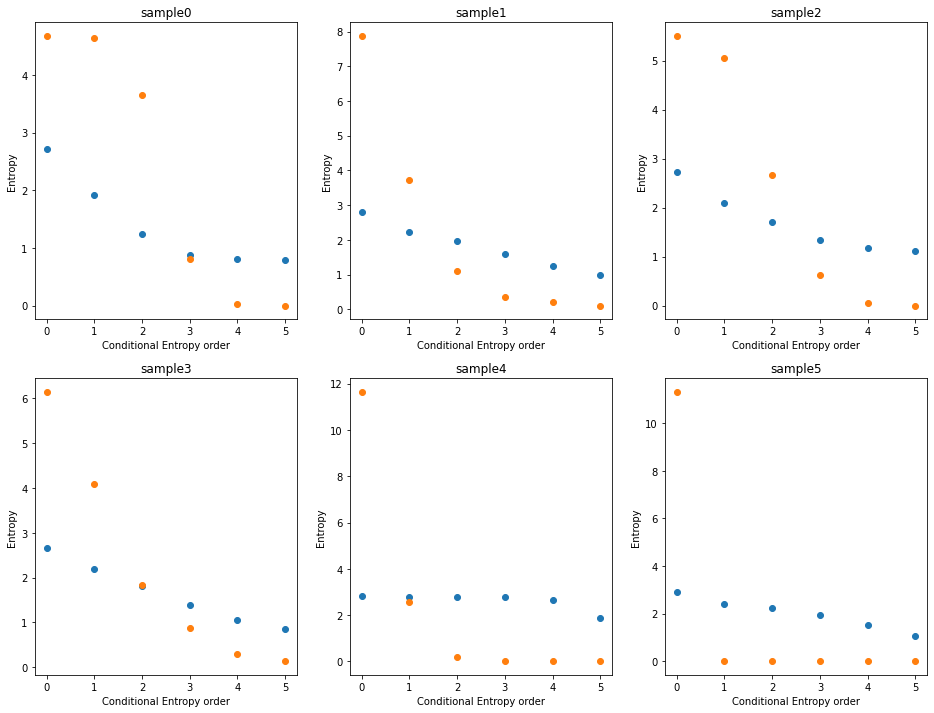

In [49]:

fig, axs = plt.subplots(2,3)
fig.set_size_inches(16,12)
for i in range(7,13):
    k=i-7
    print(f"Conditial entropy for sample{k}: ",word_ce[i])
    axs[k//3][k%3].scatter([0,1,2,3,4,5],char_ce[i],label="characters")
    axs[k//3][k%3].scatter([0,1,2,3,4,5],word_ce[i],label="words")
    axs[k//3][k%3].set_title(f"sample{k}")
    axs[k//3][k%3].set(xlabel='Conditional Entropy order', ylabel='Entropy')
plt.show()

can be natural langauge: sample1,sample3

cannot: sample0,sample2,sample4,sample5